# **Import Necessary Package**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, auc)
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

pd.set_option('display.float', '{:.2f}'.format)

In [ ]:
# read dataset

df = pd.read_csv("/content/drive/MyDrive/Data/loan_data_2007_2014(cleaned).csv")
df

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq
0,0,1077501,1296599,5000,5000,4975.00,36 months,10.65,162.87,B,...,0.00,0.00,0.00,1/15/2024,171.62,NaN,1/16/2024,0.00,INDIVIDUAL,0.00
1,1,1077430,1314167,2500,2500,2500.00,60 months,15.27,59.83,C,...,0.00,117.08,1.11,4/13/2024,119.66,NaN,9/13/2024,0.00,INDIVIDUAL,0.00
2,2,1077175,1313524,2400,2400,2400.00,36 months,15.96,84.33,C,...,0.00,0.00,0.00,6/14/2024,649.91,NaN,1/16/2024,0.00,INDIVIDUAL,0.00
3,3,1076863,1277178,10000,10000,10000.00,36 months,13.49,339.31,C,...,16.97,0.00,0.00,1/15/2024,357.48,NaN,1/15/2024,0.00,INDIVIDUAL,0.00
4,4,1075358,1311748,3000,3000,3000.00,60 months,12.69,67.79,B,...,0.00,0.00,0.00,1/16/2024,67.79,2/16/2024,1/16/2024,0.00,INDIVIDUAL,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.00,60 months,14.47,432.64,C,...,0.00,0.00,0.00,1/16/2024,432.64,2/16/2024,1/16/2024,0.00,INDIVIDUAL,0.00
466281,466281,9684700,11536848,22000,22000,22000.00,60 months,19.97,582.50,D,...,0.00,0.00,0.00,12/14/2024,17.50,NaN,1/16/2024,0.00,INDIVIDUAL,0.00
466282,466282,9584776,11436914,20700,20700,20700.00,60 months,16.99,514.34,D,...,0.00,0.00,0.00,1/16/2024,514.34,2/16/2024,12/15/2024,0.00,INDIVIDUAL,0.00
466283,466283,9604874,11457002,2000,2000,2000.00,36 months,7.90,62.59,A,...,0.00,0.00,0.00,12/14/2024,1500.68,NaN,4/15/2024,0.00,INDIVIDUAL,0.00


# **EDA DATA**

In [ ]:
# total rows and columns
df.shape

(466285, 48)

In [ ]:
# data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 48 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  466285 non-null  int64  
 1   id                          466285 non-null  int64  
 2   member_id                   466285 non-null  int64  
 3   loan_amnt                   466285 non-null  int64  
 4   funded_amnt                 466285 non-null  int64  
 5   funded_amnt_inv             466285 non-null  float64
 6   term                        466285 non-null  object 
 7   int_rate                    466285 non-null  float64
 8   installment                 466285 non-null  float64
 9   grade                       466285 non-null  object 
 10  sub_grade                   466285 non-null  object 
 11  emp_length                  445277 non-null  object 
 12  home_ownership              466285 non-null  object 
 13  annual_inc    

In [ ]:
df.isnull().any()

Unnamed: 0                    False
id                            False
member_id                     False
loan_amnt                     False
funded_amnt                   False
funded_amnt_inv               False
term                          False
int_rate                      False
installment                   False
grade                         False
sub_grade                     False
emp_length                     True
home_ownership                False
annual_inc                     True
verification_status           False
issue_d                       False
loan_status                   False
purpose                       False
zip_code                      False
addr_state                    False
dti                           False
delinq_2yrs                    True
earliest_cr_line               True
inq_last_6mths                 True
mths_since_last_delinq         True
mths_since_last_record         True
open_acc                       True
pub_rec                     

In [ ]:
df.isna().sum()

Unnamed: 0                         0
id                                 0
member_id                          0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_length                     21008
home_ownership                     0
annual_inc                         4
verification_status                0
issue_d                            0
loan_status                        0
purpose                            0
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                       29
earliest_cr_line                  29
inq_last_6mths                    29
mths_since_last_delinq        250351
mths_since_last_record        403647
open_acc                          29
p

In [ ]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [ ]:
df['good_bad'] = np.where(df['loan_status'].isin(['Charged Off', 'Late (31-120 days)', 'Default', 'Does not meet the credit policy. Status:Charged Off', 'Late (16-30 days)', 'Does not meet the credit policy. Status:Fully Paid']), 0, 1)
df[['good_bad', 'loan_status']]

,good_bad,loan_status
0,1,Fully Paid
1,0,Charged Off
2,1,Fully Paid
3,1,Fully Paid
4,1,Current
...,...,...
466280,1,Current
466281,0,Charged Off
466282,1,Current
466283,1,Fully Paid


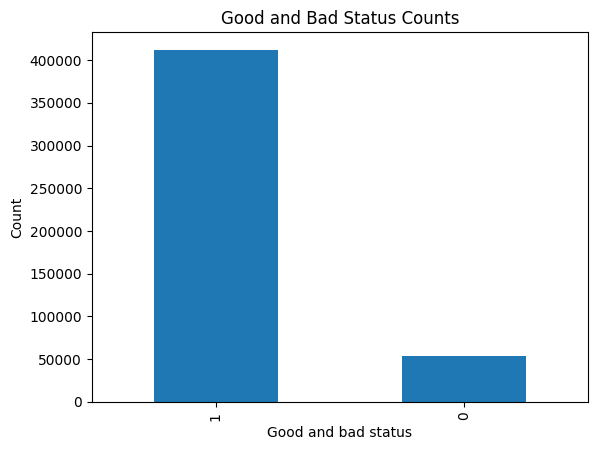

In [ ]:
df['good_bad'].value_counts().plot.bar(title = "Good and Bad Status Counts", xlabel='Good and bad status', ylabel='Count');

<ipython-input-70-a0df67f63da1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='viridis')


<Axes: >

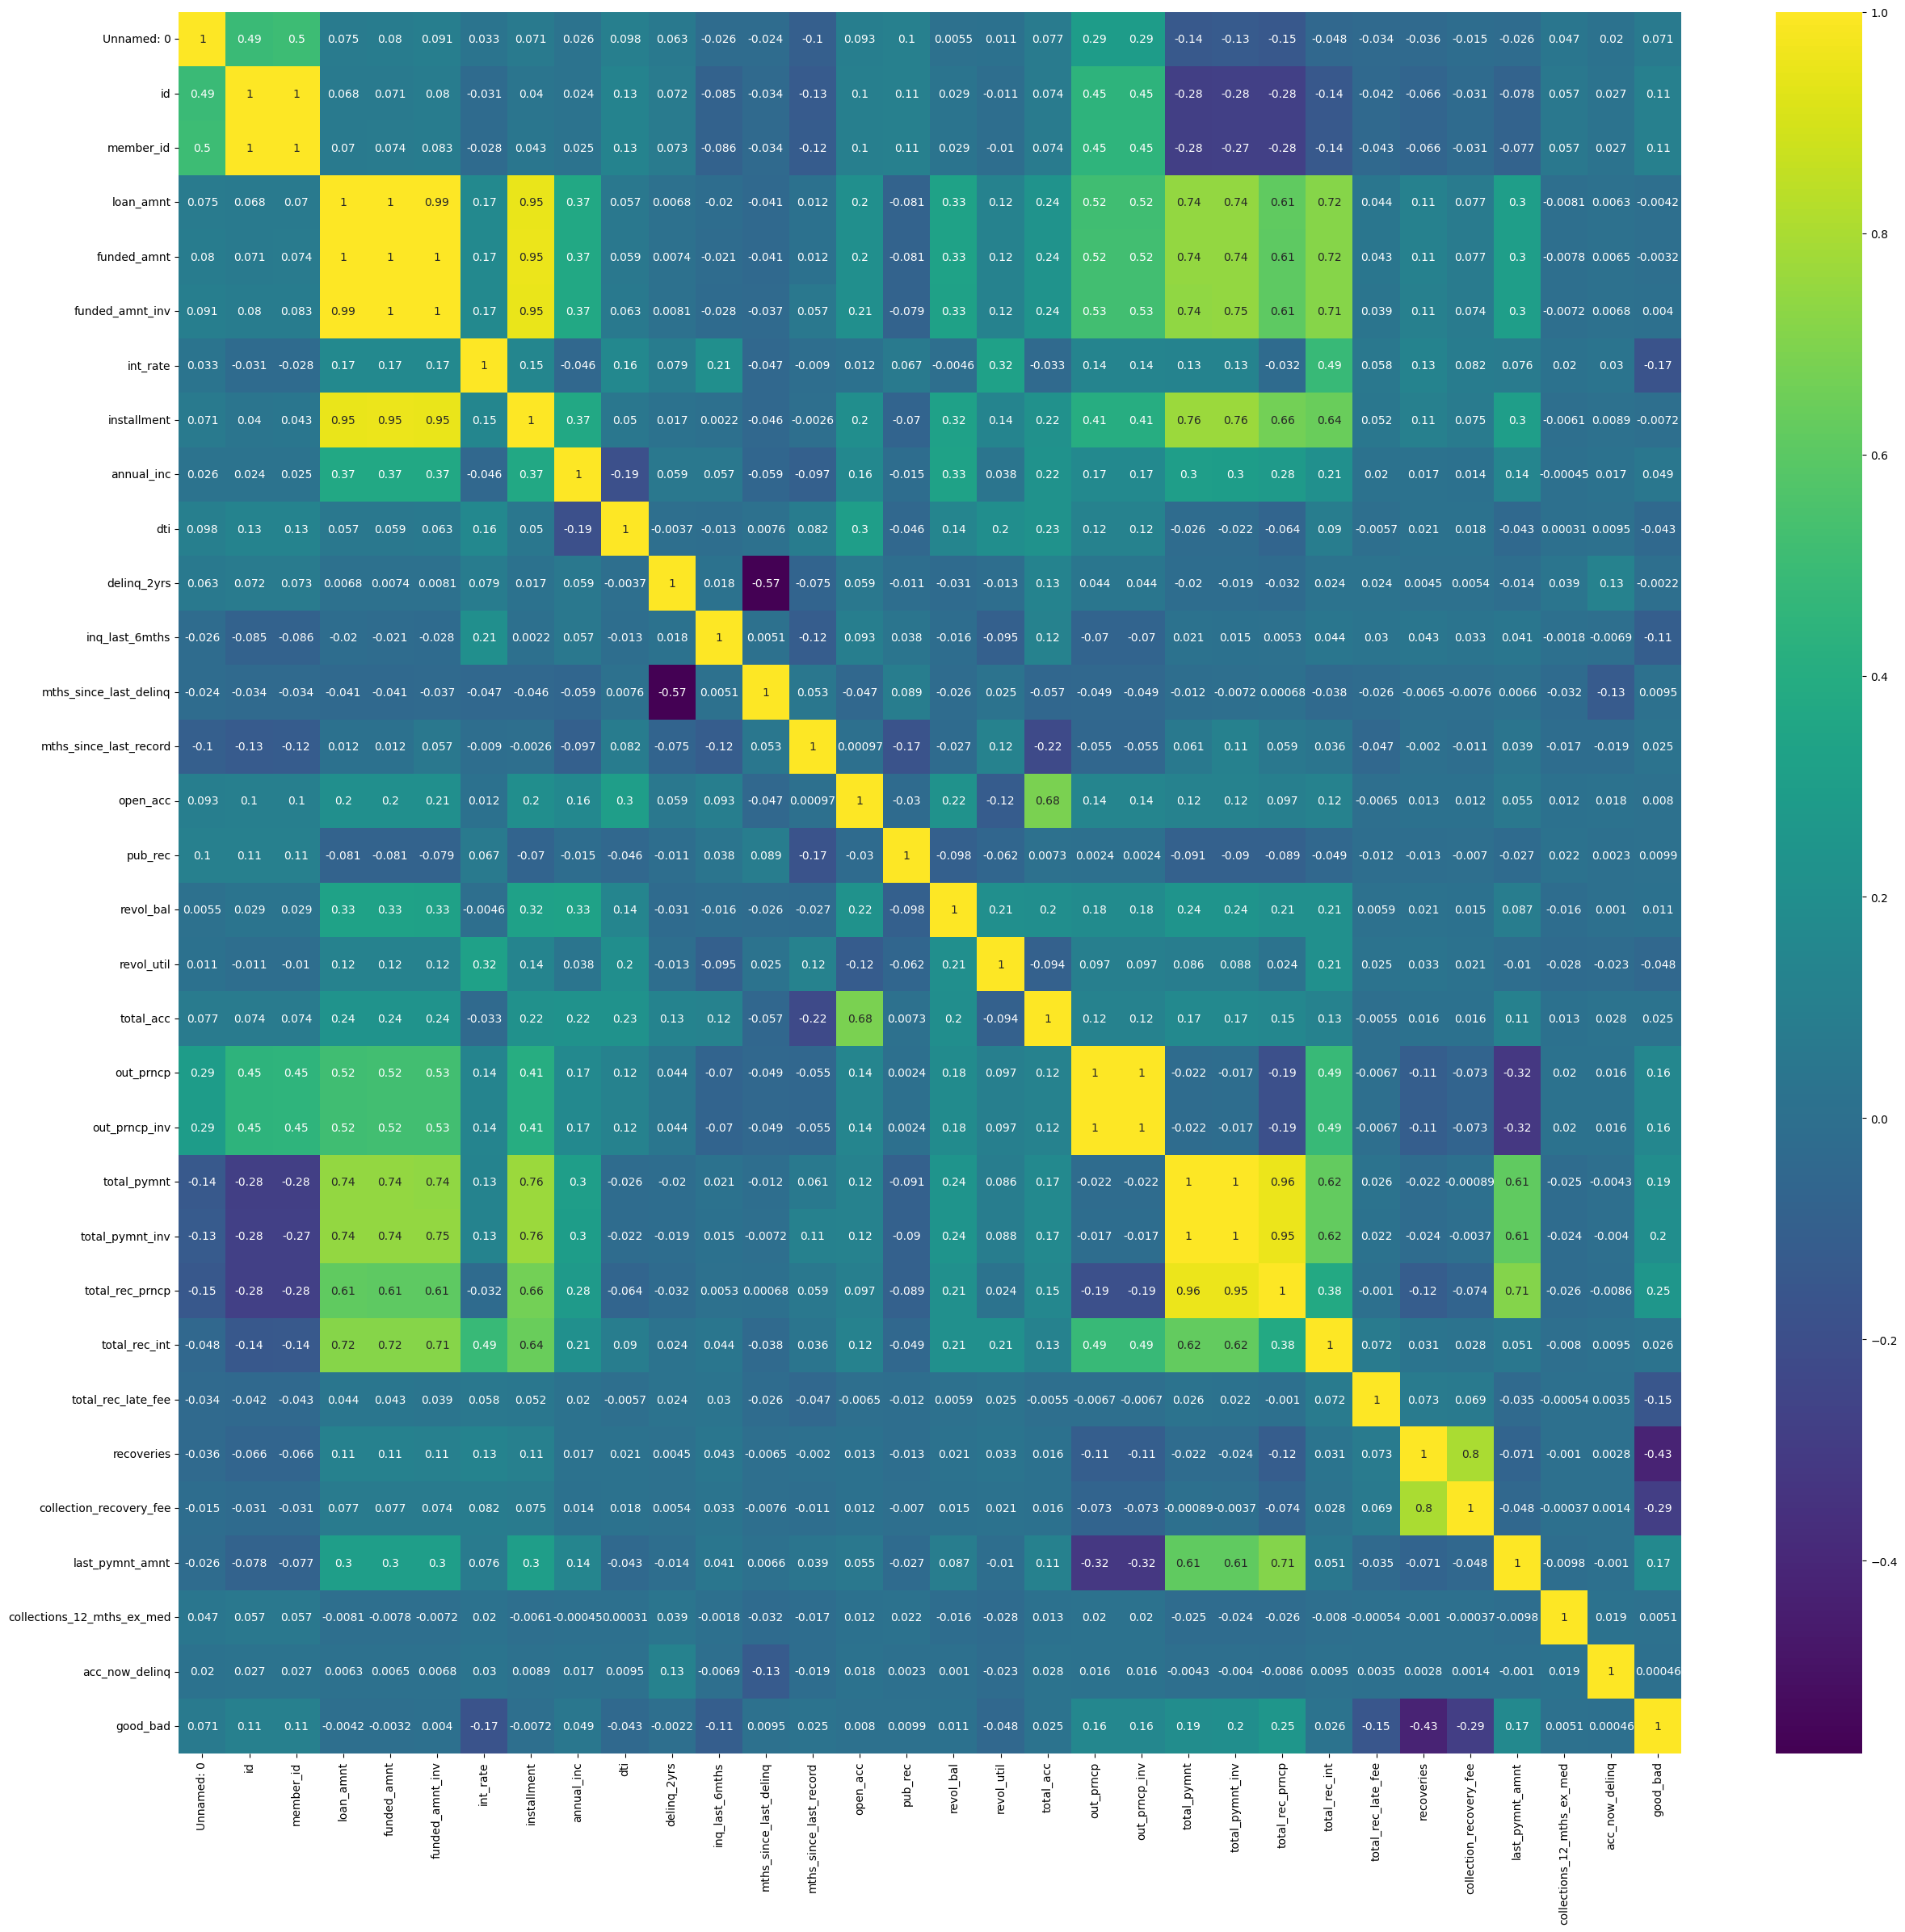

In [ ]:
plt.figure(figsize=[30, 28])
sns.heatmap(df.corr(), annot=True, cmap='viridis')

<Figure size 1500x1000 with 0 Axes>

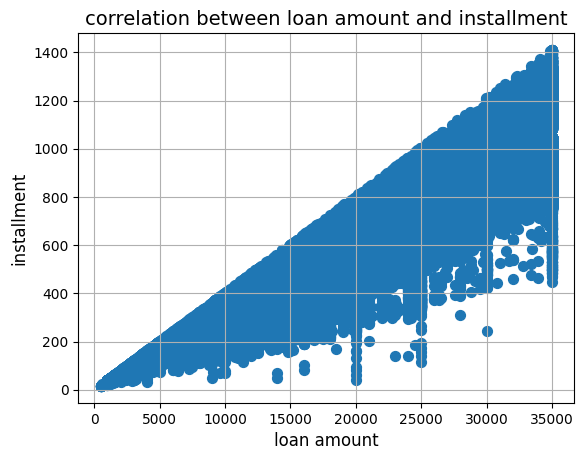

In [ ]:
x= ['loan_amnt']; y = ['installment']
plt.figure(figsize=[15,10])
df.plot.scatter(x, y, s=50);
plt.grid(True)
plt.title('correlation between loan amount and installment', fontsize=14)
plt.xlabel("loan amount",fontsize=12)
plt.ylabel("installment", fontsize=12)
plt.show()

<Axes: title={'center': 'loan_amnt'}, xlabel='good_bad'>

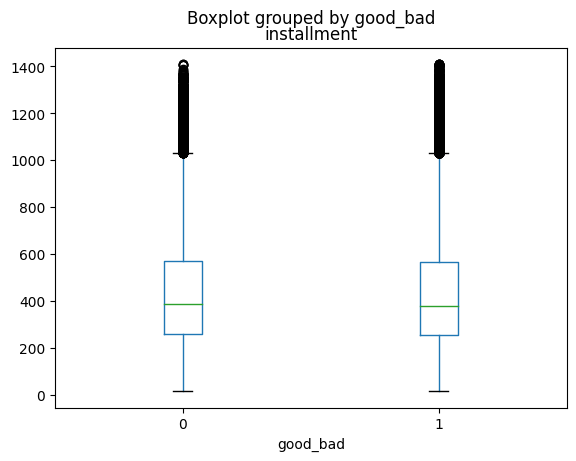

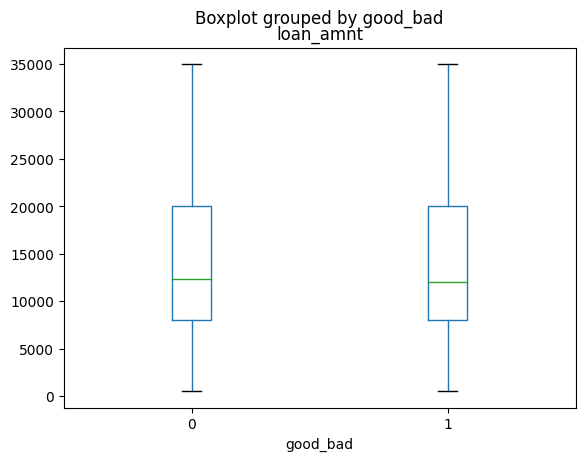

In [ ]:
df.boxplot(by ='good_bad', column =['installment'], grid = False)

df.boxplot(by ='good_bad', column =['loan_amnt'], grid = False)

In [ ]:
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,good_bad
count,466285.00,466285.00,466285.00,466285.00,466285.00,466285.00,466285.00,466285.00,466281.00,466285.00,...,466285.00,466285.00,466285.00,466285.00,466285.00,466285.00,466285.00,466140.00,466256.00,466285.00
mean,233142.00,13079729.91,14597660.62,14317.28,14291.80,14222.33,13.83,432.06,73277.38,17.22,...,11469.89,8866.01,2588.68,0.65,85.34,8.96,3123.91,0.01,0.00,0.88
std,134605.03,10893711.62,11682367.44,8286.51,8274.37,8297.64,4.36,243.49,54963.57,7.85,...,8254.16,7031.69,2483.81,5.27,552.22,85.49,5554.74,0.11,0.07,0.32
min,0.00,54734.00,70473.00,500.00,500.00,0.00,5.42,15.67,1896.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,116571.00,3639987.00,4379705.00,8000.00,8000.00,8000.00,10.99,256.69,45000.00,11.36,...,5499.25,3708.56,957.28,0.00,0.00,0.00,312.62,0.00,0.00,1.00
50%,233142.00,10107897.00,11941075.00,12000.00,12000.00,12000.00,13.66,379.89,63000.00,16.87,...,9355.43,6817.76,1818.88,0.00,0.00,0.00,545.96,0.00,0.00,1.00
75%,349713.00,20731209.00,23001541.00,20000.00,20000.00,19950.00,16.49,566.58,88960.00,22.78,...,15231.31,12000.00,3304.53,0.00,0.00,0.00,3187.51,0.00,0.00,1.00
max,466284.00,38098114.00,40860827.00,35000.00,35000.00,35000.00,26.06,1409.99,7500000.00,39.99,...,57777.58,35000.03,24205.62,358.68,33520.27,7002.19,36234.44,20.00,5.00,1.00


# **Data Preprocessing**

In [ ]:
# Missing values
for column in df.columns:
    if df[column].isna().sum() != 0:
        missing = df[column].isna().sum()
        portion = (missing / df.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.2f}%'")

'emp_length': number of missing values '21008' ==> '4.51%'
'annual_inc': number of missing values '4' ==> '0.00%'
'delinq_2yrs': number of missing values '29' ==> '0.01%'
'earliest_cr_line': number of missing values '29' ==> '0.01%'
'inq_last_6mths': number of missing values '29' ==> '0.01%'
'mths_since_last_delinq': number of missing values '250351' ==> '53.69%'
'mths_since_last_record': number of missing values '403647' ==> '86.57%'
'open_acc': number of missing values '29' ==> '0.01%'
'pub_rec': number of missing values '29' ==> '0.01%'
'revol_util': number of missing values '340' ==> '0.07%'
'total_acc': number of missing values '29' ==> '0.01%'
'last_pymnt_d': number of missing values '376' ==> '0.08%'
'next_pymnt_d': number of missing values '227214' ==> '48.73%'
'last_credit_pull_d': number of missing values '42' ==> '0.01%'
'collections_12_mths_ex_med': number of missing values '145' ==> '0.03%'
'acc_now_delinq': number of missing values '29' ==> '0.01%'


In [ ]:
# fill the missing value
mean_value = df['annual_inc'].mean()
df['annual_inc'].fillna(value=mean_value, inplace=True)
print('Updated Dataframe:')
df['annual_inc']

Updated Dataframe:


0         24000.00
1         30000.00
2         12252.00
3         49200.00
4         80000.00
            ...   
466280   110000.00
466281    78000.00
466282    46000.00
466283    83000.00
466284    46000.00
Name: annual_inc, Length: 466285, dtype: float64

In [ ]:
# fill the missing value 2
median_value = df['delinq_2yrs'].median()
df['delinq_2yrs'].fillna(value=median_value, inplace=True)
print('Updated Dataframe:')
df['delinq_2yrs']

Updated Dataframe:


0        0.00
1        0.00
2        0.00
3        0.00
4        0.00
         ... 
466280   0.00
466281   0.00
466282   0.00
466283   3.00
466284   1.00
Name: delinq_2yrs, Length: 466285, dtype: float64

In [ ]:
# fill the missing value 3
median_values = df['inq_last_6mths'].median()
df['inq_last_6mths'].fillna(value=median_values, inplace=True)
print('Updated Dataframe:')
df['inq_last_6mths']

Updated Dataframe:


0        1.00
1        5.00
2        2.00
3        1.00
4        0.00
         ... 
466280   2.00
466281   5.00
466282   2.00
466283   1.00
466284   0.00
Name: inq_last_6mths, Length: 466285, dtype: float64

In [ ]:
# fill the missing value 4
median_value1 = df['open_acc'].median()
df['open_acc'].fillna(value=median_value1, inplace=True)
print('Updated Dataframe:')
df['open_acc']

Updated Dataframe:


0         3.00
1         3.00
2         2.00
3        10.00
4        15.00
          ... 
466280   18.00
466281   18.00
466282   18.00
466283   21.00
466284    6.00
Name: open_acc, Length: 466285, dtype: float64

In [ ]:
# fill the missing value 5
median_value2 = df['pub_rec'].median()
df['pub_rec'].fillna(value=median_value2, inplace=True)
print('Updated Dataframe:')
df['pub_rec']

Updated Dataframe:


0        0.00
1        0.00
2        0.00
3        0.00
4        0.00
         ... 
466280   0.00
466281   1.00
466282   0.00
466283   0.00
466284   0.00
Name: pub_rec, Length: 466285, dtype: float64

In [ ]:
# fill the missing value 6
mean_values = df['revol_util'].mean()
mean_formatted = round(mean_values,1)
df['revol_util'].fillna(value=mean_formatted, inplace=True)
print('Updated Dataframe:')
df['revol_util']

Updated Dataframe:


0        83.70
1         9.40
2        98.50
3        21.00
4        53.90
          ... 
466280   77.60
466281   46.30
466282   51.10
466283   21.50
466284   70.80
Name: revol_util, Length: 466285, dtype: float64

In [ ]:
# fill the missing value 5
median_value3 = df['total_acc'].median()
df['total_acc'].fillna(value=median_value3, inplace=True)
print('Updated Dataframe:')
df['total_acc']

Updated Dataframe:


0         9.00
1         4.00
2        10.00
3        37.00
4        38.00
          ... 
466280   36.00
466281   30.00
466282   43.00
466283   27.00
466284   22.00
Name: total_acc, Length: 466285, dtype: float64

In [ ]:
# fill the missing value 6
median_value4 = df['collections_12_mths_ex_med'].median()
df['collections_12_mths_ex_med'].fillna(value=median_value4, inplace=True)
print('Updated Dataframe:')
df['collections_12_mths_ex_med']

Updated Dataframe:


0        0.00
1        0.00
2        0.00
3        0.00
4        0.00
         ... 
466280   0.00
466281   0.00
466282   0.00
466283   0.00
466284   0.00
Name: collections_12_mths_ex_med, Length: 466285, dtype: float64

In [ ]:
# fill the missing value 7
median_value5 = df['acc_now_delinq'].median()
df['acc_now_delinq'].fillna(value=median_value5, inplace=True)
print('Updated Dataframe:')
df['acc_now_delinq']

Updated Dataframe:


0        0.00
1        0.00
2        0.00
3        0.00
4        0.00
         ... 
466280   0.00
466281   0.00
466282   0.00
466283   0.00
466284   0.00
Name: acc_now_delinq, Length: 466285, dtype: float64

In [ ]:
# Drop missing value
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

Unnamed: 0                    0
id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq        0
mths_since_last_record        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('id', axis=1, inplace=True)
df.drop('member_id', axis=1, inplace=True)
df.drop('addr_state', axis=1, inplace=True)
df.drop('application_type', axis=1, inplace=True)
df.drop('grade', axis=1, inplace=True)
df.drop('loan_status', axis=1, inplace=True)
df.drop('issue_d', axis=1, inplace=True)
df.drop('last_pymnt_d', axis=1, inplace=True)
df.drop('next_pymnt_d', axis=1, inplace=True)
df.drop('last_credit_pull_d', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17294 entries, 658 to 466274
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   17294 non-null  int64  
 1   funded_amnt                 17294 non-null  int64  
 2   funded_amnt_inv             17294 non-null  float64
 3   term                        17294 non-null  object 
 4   int_rate                    17294 non-null  float64
 5   installment                 17294 non-null  float64
 6   sub_grade                   17294 non-null  object 
 7   emp_length                  17294 non-null  object 
 8   home_ownership              17294 non-null  object 
 9   annual_inc                  17294 non-null  float64
 10  verification_status         17294 non-null  object 
 11  purpose                     17294 non-null  object 
 12  zip_code                    17294 non-null  object 
 13  dti                         

In [ ]:
df.shape

(17294, 38)

In [ ]:
print([column for column in df.columns if df[column].dtype == object])

['term', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'zip_code', 'earliest_cr_line', 'initial_list_status']


In [ ]:
df.term.unique()

array([' 60 months', ' 36 months'], dtype=object)

In [ ]:
df.emp_length.unique()

array(['5 years', '2 years', '10+ years', '4 years', '1 year', '8 years',
       '6 years', '9 years', '3 years', '7 years', '< 1 year'],
      dtype=object)

In [ ]:
# convert datatypes
term_values = {' 36 months': 36, ' 60 months': 60}
df['term'] = df.term.map(term_values)

In [ ]:
df.term.unique()

array([60, 36])

In [ ]:
emp_length_values = {'5 years': 5, '2 years': 2, '10+ years' : 10, '4 years' : 4, '3 years': 3, '1 year' : 1, '8 years' : 8, '6 years' : 6,  '9 years' : 9, '7 years' : 7, '< 1 year' : 1}
df['emp_length'] = df.emp_length.map(emp_length_values)

In [ ]:
df.emp_length.unique()

array([ 5,  2, 10,  4,  1,  8,  6,  9,  3,  7])

In [ ]:
# Convert the column to datetime format if it's not already in datetime format
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], errors='coerce')

# Extract the year and create a new column
df['earliest_cr_line'] = df['earliest_cr_line'].dt.year

In [ ]:
df.earliest_cr_line.value_counts()

2024    4650
2000    1326
1999    1227
1998    1083
1996    1019
1997     912
1995     908
1994     858
1993     692
1991     480
1992     480
1990     477
1989     454
1988     375
1987     348
1986     300
1985     257
1984     252
1983     222
1982     164
1981     110
1979     106
1978      91
1980      89
1977      88
1976      63
1975      43
1974      42
1973      34
1972      31
1970      19
1971      16
1966      15
1967      13
1968      12
1969      11
1965       7
1964       5
1963       3
1962       2
1958       2
1949       1
1944       1
1959       1
1960       1
1957       1
1951       1
1961       1
1950       1
Name: earliest_cr_line, dtype: int64

In [ ]:
df['initial_list_status'].replace(("f","w"),(0,1), inplace=True)
df['initial_list_status']

658       0
3252      0
3656      0
3713      0
6359      0
         ..
466173    0
466178    1
466228    1
466251    0
466274    1
Name: initial_list_status, Length: 17294, dtype: int64

In [ ]:
dummies = ['sub_grade', 'home_ownership', 'verification_status', 'purpose', 'zip_code']
df = pd.get_dummies(df, columns=dummies, drop_first=True)

In [ ]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,...,zip_code_989xx,zip_code_990xx,zip_code_991xx,zip_code_992xx,zip_code_993xx,zip_code_994xx,zip_code_995xx,zip_code_996xx,zip_code_997xx,zip_code_999xx
658,7600,7600,7600.00,60,16.77,187.95,5,50000.00,6.29,0.00,...,0,0,0,0,0,0,0,0,0,0
3252,6000,6000,6000.00,60,19.03,155.75,2,38400.00,20.47,0.00,...,0,0,0,0,0,0,0,0,0,0
3656,7400,7400,7400.00,60,17.58,186.23,10,63478.00,11.25,0.00,...,0,0,0,0,0,0,0,0,0,0
3713,15000,15000,14750.00,60,18.25,382.95,10,49000.00,14.25,0.00,...,0,0,0,0,0,0,0,0,0,0
6359,2000,2000,2000.00,60,14.27,46.82,4,32004.00,19.31,1.00,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17294 entries, 658 to 466274
Columns: 887 entries, loan_amnt to zip_code_999xx
dtypes: float64(25), int64(8), uint8(854)
memory usage: 18.6 MB


In [ ]:
df.shape

(17294, 887)

# **Train Test Split**

In [ ]:
y = df['good_bad']
X = df.drop(['good_bad'],axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# print
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (11586, 886)
y_train: (11586,)
X_test: (5708, 886)
y_test: (5708,)


In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Modelling**

In [ ]:
def print_score(true, pred, train=True):
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

In [ ]:
# Create an SVC model
svc_model = SVC(kernel='rbf', C=1)

In [ ]:
# Train the model
svc_model.fit(X_train, y_train)

# Predict on the tes & train set
y_pred = svc_model.predict(X_test)

In [ ]:
print_score(y_test, y_pred, train=False)

Accuracy Score: 95.27%
_______________________________________________
CLASSIFICATION REPORT:
               0       1  accuracy  macro avg  weighted avg
precision   1.00    0.95      0.95       0.97          0.95
recall      0.44    1.00      0.95       0.72          0.95
f1-score    0.61    0.97      0.95       0.79          0.94
support   484.00 5224.00      0.95    5708.00       5708.00
_______________________________________________
Confusion Matrix: 
 [[ 215  269]
 [   1 5223]]



In [ ]:
# create random forest model
rf = RandomForestClassifier(n_estimators=100)

In [ ]:
# train the model
rf.fit(X_train, y_train)

# predict the model
rf_pred = rf.predict(X_test)

In [ ]:
print_score(y_test, rf_pred, train=False)

Accuracy Score: 95.80%
_______________________________________________
CLASSIFICATION REPORT:
               0       1  accuracy  macro avg  weighted avg
precision   0.99    0.96      0.96       0.97          0.96
recall      0.51    1.00      0.96       0.75          0.96
f1-score    0.67    0.98      0.96       0.82          0.95
support   484.00 5224.00      0.96    5708.00       5708.00
_______________________________________________
Confusion Matrix: 
 [[ 246  238]
 [   2 5222]]



In [ ]:
# create lr classifier model
lr = LogisticRegression()

In [ ]:
# train the model
lr.fit(X_train,y_train)

# predict the model
lr_pred = lr.predict(X_test)

print_score(y_test, lr_pred, train=False)

Accuracy Score: 95.08%
_______________________________________________
CLASSIFICATION REPORT:
               0       1  accuracy  macro avg  weighted avg
precision   0.98    0.95      0.95       0.97          0.95
recall      0.43    1.00      0.95       0.71          0.95
f1-score    0.60    0.97      0.95       0.78          0.94
support   484.00 5224.00      0.95    5708.00       5708.00
_______________________________________________
Confusion Matrix: 
 [[ 207  277]
 [   4 5220]]



In [ ]:
XGB = XGBClassifier()

In [ ]:
XGB.fit(X_train,y_train)

XGBpred = XGB.predict(X_test)

print_score(y_test, XGBpred, train=False)

Accuracy Score: 95.92%
_______________________________________________
CLASSIFICATION REPORT:
               0       1  accuracy  macro avg  weighted avg
precision   0.95    0.96      0.96       0.95          0.96
recall      0.55    1.00      0.96       0.77          0.96
f1-score    0.69    0.98      0.96       0.84          0.95
support   484.00 5224.00      0.96    5708.00       5708.00
_______________________________________________
Confusion Matrix: 
 [[ 265  219]
 [  14 5210]]



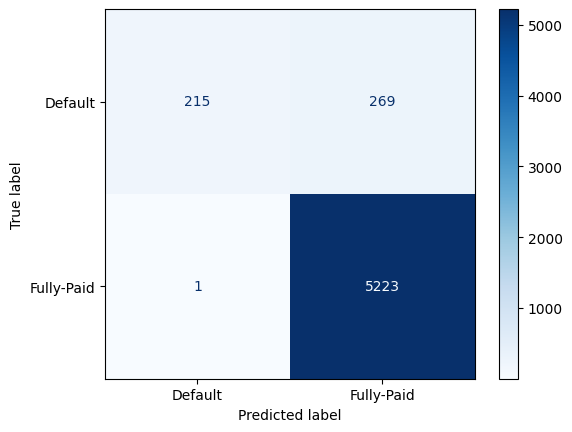

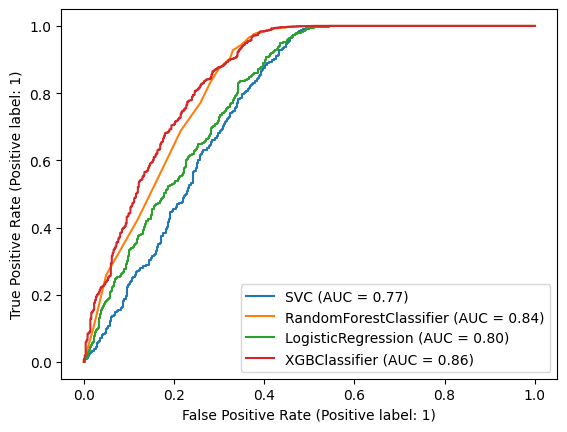

In [ ]:
# confusion matrix & ROC
disp = ConfusionMatrixDisplay.from_estimator(svc_model, X_test, y_test,
                             cmap='Blues', values_format='d',
                             display_labels=['Default', 'Fully-Paid'])

disp = RocCurveDisplay.from_estimator(svc_model, X_test, y_test)
RocCurveDisplay.from_estimator(rf, X_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(lr, X_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(XGB, X_test, y_test, ax=disp.ax_)

# **Comparing Model**

In [ ]:
ml_models = {
    'SVM': svc_model,
    'Random forest': rf,
    'Logistic Regression': lr,
    'XG Boost' : XGB
}

for model in ml_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")

SVM                            roc_auc_score: 0.722
RANDOM FOREST                  roc_auc_score: 0.754
LOGISTIC REGRESSION            roc_auc_score: 0.713
XG BOOST                       roc_auc_score: 0.772


SVM                            ROC-AUC Score: 0.722
RANDOM FOREST                  ROC-AUC Score: 0.754
LOGISTIC REGRESSION            ROC-AUC Score: 0.713
XG BOOST                       ROC-AUC Score: 0.772


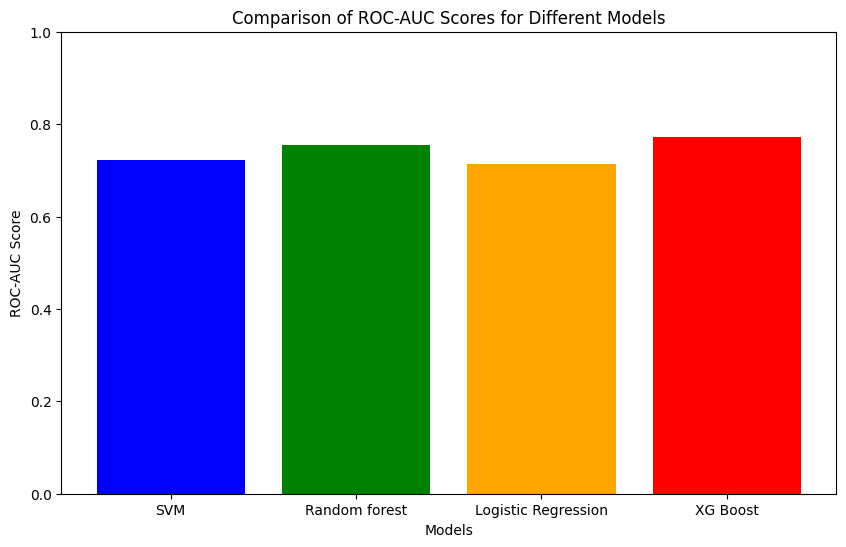

In [ ]:
# Lists to store model names and ROC-AUC scores
model_names = []
roc_auc_scores = []

# Iterate through models and print ROC-AUC scores
for model_name, model in ml_models.items():
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f"{model_name.upper():{30}} ROC-AUC Score: {roc_auc:.3f}")

    # Append to lists for plotting
    model_names.append(model_name)
    roc_auc_scores.append(roc_auc)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, roc_auc_scores, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Models')
plt.ylabel('ROC-AUC Score')
plt.title('Comparison of ROC-AUC Scores for Different Models')
plt.ylim([0.0, 1.0])
plt.show()
